# Figure S1 

This script contains the analysis for generating plots in Figure S1. of Inge *et al.* _(Dev. Cell, 2025)_.

Functions are located in "Figure_S1_Plotting_functions.py".

## Load Modules

In [2]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from re import match
import warnings
from scipy import stats
import glob

warnings.filterwarnings("ignore")

import Figure_S1_Plotting_functions as PF

%matplotlib inline

ingeo_colours = ["#0077BB", "#33BBEE", "#009988", "#EE7733", "#CC3311", "#EE3377", "#BBBBBB", "#5D55A4"]



## Figure S1A-B - Schematics:

Schematics made in illustrator.  

Located in: `Figure_S1/All_Panels/`

## Figure S1C - Contour gating:


Example of gating of cell fate proportions using data from HAND1/GATA6 dose response.  
  
This data is found in: `Figure_1\DoseResponseData\Processed\REPEAT1_feature_data.csv`

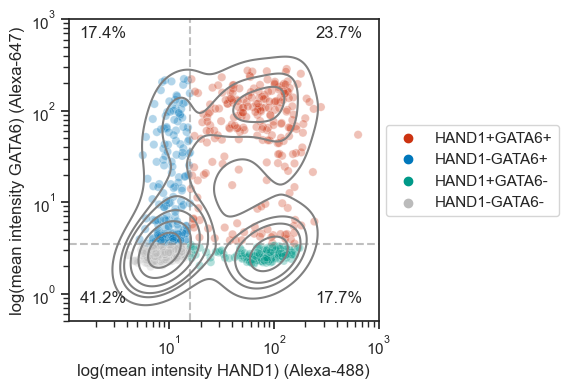

In [3]:
DR_r1 = pd.read_csv("../Figure_1/Figure1B-C_DoseResponseData/Processed/REPEAT1_feature_data.csv") 
df = DR_r1

##########################
### Pre-process data #####
##########################
df_, df, conditions = PF.processing_gated_plot(df)

######################
### Gating cells #####
######################

dual, all_ = PF.dual_marker_thresholding(df, mk1 = "mean_intensity_GFP", marker1_name="HAND1", mk1T = 16, mk2 = "mean_intensity_Alexa", marker2_name = "GATA6", mk2T = 3.5, conditions_to_split = "Condition")
dual = dual.round(decimals = 1)
dual = dual.loc[dual['Condition']==conditions[0]]
dual_all = dual.mean().round(decimals = 2)

#################
### Merging #####
#################

df_ = df_.merge(
all_[['label', 'Position', 'Well', 'Condition', 'cell_type_status']],
on=['label', 'Position', 'Well', 'Condition'],
how='left')


#################
## Plot figure ##
#################

palette = [ingeo_colours[4], ingeo_colours[0], ingeo_colours[2], ingeo_colours[6]]
hue_order = ["HAND1+GATA6+","HAND1-GATA6+","HAND1+GATA6-","HAND1-GATA6-"]


PF.contour_gates(df_, "mean_intensity_GFP", "mean_intensity_Alexa", "cell_type_status", palette, hue_order, dual_all)


Images associated with 1C are found in folder `Figure_S1/PLACEHOLDER`

## Figure S1D - 4i Schematic:

Schematic of Iterative Indirect Immunofluorescence Imaging (4i) protocol.

Located in: `Figure_S1/All_Panels/`

## Figure S1E - 4i stating BMP4:


Successive rounds of 4i imaging were registered using Fast4Dreg:  
- https://journals.biologists.com/jcs/article/136/4/jcs260728/287682/Fast4DReg-fast-registration-of-4D-microscopy
- https://iopscience.iop.org/article/10.1088/1361-6463/ab0261 

We used the following implementaiton:
https://github.com/FrancisCrickInstitute/Multiplex-Imaging-Registration/tree/main?tab=readme-ov-file 

Data was segmentation and feature extraction performed using our segmentation pipeline:

`Figure_S1/Placeholder`

Images were processed and panels generated using fiji and napari.

Napari script for S1E is located: `Figure_S1/Placeholder`

## Figure S1F-G - Dose response overviews:

Image overviews for Figure S1F-G were generated using the `OVERVIEW_MAKER.sh` script and processed using Fiji.

Processed images are located: `Figure_S1/Placeholder`

## Figure S1H - Additional dose repsonse heatmaps:

Heatmap figures for additional markers. These were generated using the same function as Figure 1C


In [4]:
dr_all = pd.read_csv("S1H-J_AdditionalDoseResponseData/All_drprops.csv")

##########################
### Pre-process data #####
##########################

dr_all = dr_all.drop(['Unnamed: 0'], axis=1)
dr_all[['B', 'A']] = dr_all['Condition'].str.split(' ', n=2, expand=True)
dr_all.B = dr_all.B.map(lambda x: x.lstrip('B').rstrip('aAbBcC'))
dr_all.A = dr_all.A.map(lambda x: x.lstrip('A').rstrip('aAbBcC'))
dr_all = dr_all.sort_values(['A'])
dr_all.A = dr_all.A.astype(int)
dr_all.B = dr_all.B.astype(int)

dr_all = dr_all.groupby(['Condition','A','B']).mean()
dr_all = dr_all.reset_index()


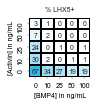

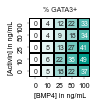

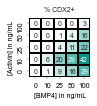

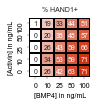

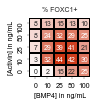

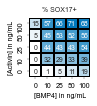

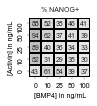

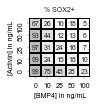

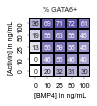

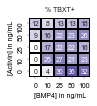

In [5]:
##################
### Plotting #####
##################

PF.Heatmap_figure(dr_all, "LHX5+", colour_pal_sel=ingeo_colours[1], vmin_=0)
PF.Heatmap_figure(dr_all, "GATA3+", colour_pal_sel=ingeo_colours[2], vmin_=0)
PF.Heatmap_figure(dr_all, "CDX2+", colour_pal_sel=ingeo_colours[2], vmin_=0)
PF.Heatmap_figure(dr_all, "HAND1+", colour_pal_sel=ingeo_colours[4], vmin_=0)
PF.Heatmap_figure(dr_all, "FOXC1+", colour_pal_sel=ingeo_colours[4], vmin_=0)
PF.Heatmap_figure(dr_all, "SOX17+", colour_pal_sel=ingeo_colours[0], vmin_=0)
PF.Heatmap_figure(dr_all, "NANOG+", colour_pal_sel=ingeo_colours[6], vmin_=0)
PF.Heatmap_figure(dr_all, "SOX2+", colour_pal_sel=ingeo_colours[6], vmin_=0)
PF.Heatmap_figure(dr_all, "GATA6+", colour_pal_sel=ingeo_colours[7], vmin_=0)
PF.Heatmap_figure(dr_all, "TBXT+", colour_pal_sel=ingeo_colours[7], vmin_=0)

## Figure S1I - Line plot:

Plotting proportions of fates at maximal concentrations of BMP4 and Activin.  
  
Data is located at `Figure_1/DoseResponseData/Processed/`

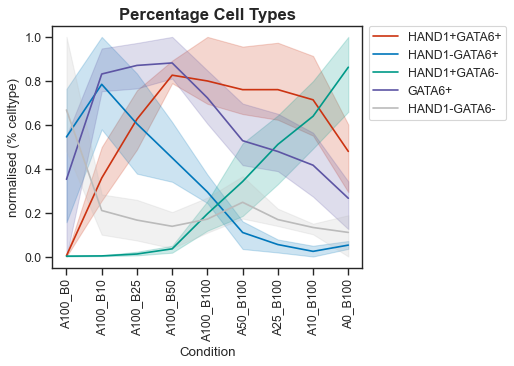

In [6]:
DR_r1 = pd.read_csv("../Figure_1/Figure1B-C_DoseResponseData/Processed/REPEAT1_GatedProportions.csv") # REPEAT1_OI_221019_DoseResponse72hr_ACT_BMP4_HAND1488_GATA6647_001
DR_r2 = pd.read_csv("../Figure_1/Figure1B-C_DoseResponseData/Processed/REPEAT2_GatedProportions.csv") # REPEAT2_OI_2022_12_09_DoseResponse_HAND1647_GATA6568_TFAP2C488_72hr_repeat2_001
DR_r3 = pd.read_csv("../Figure_1/Figure1B-C_DoseResponseData/Processed/REPEAT3_GatedProportions.csv") # REPEAT3_OI_2022_12_08_DoseResponse_HAND1647_GATA6568_TFAP2C488_72hr_001

data_ = pd.concat([DR_r1, DR_r2, DR_r3])
data_['Condition'] = data_[['Activin','BMP4']].agg('_'.join, axis=1)

#############################################################
### Converting conditions into concentration annotation #####
#############################################################

data_[['A', 'B']] = data_['Condition'].str.split('_', n=2, expand=True)
data_.B = data_.B.map(lambda x: x.lstrip('B').rstrip('aAbBcC'))
data_.A = data_.A.map(lambda x: x.lstrip('A').rstrip('aAbBcC'))

data_['Signal_cond'] = 'A' + data_['A'].astype(str) + '_B' + data_['B'].astype(str)
df = data_[["Signal_cond", "HAND1+GATA6-","HAND1-GATA6+","HAND1+GATA6+","HAND1-GATA6-"]]
order = list(df.Signal_cond.unique())

df = df.loc[df['Signal_cond'].isin(order)]
df = df.set_index("Signal_cond").loc[order]
df = df.reset_index()

df['HAND1+'] = df['HAND1+GATA6-'] + df['HAND1+GATA6+']
df['GATA6+'] = df['HAND1-GATA6+'] + df['HAND1+GATA6+']

##################
### Plotting #####
##################

PF.plotting_max_dose(df)

## Figure SJ - Clustered heatmap of dose response data

All proportion from dose response assays were clustered together in `R` using `pheatmap`.  
  
The script for generating this figure is located at : `Figure_S1/DR_Heatmap.R`.  
  
The final figure is located at: `All_Panels/Figure_S1J`.

## Figure S1K-L - Switching additional markers:

Bar plots of cell fate proportions when switching.


In [7]:
AddSwitch = pd.read_csv("S1K-L_AdditionalSwitchingData/Processed/AdditionalSwitchingProcessed.csv")


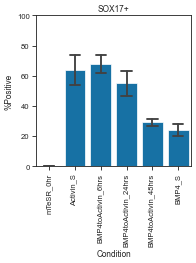

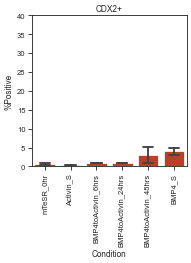

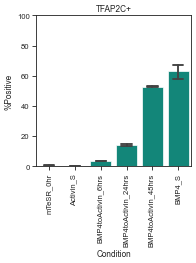

In [14]:
## BMP4 to Activin

Marker = 'SOX17'
SwDir = 'BtA'

subset, order = PF.process_addswitch(AddSwitch, SwDir, Marker)
PF.barplot_fs(subset, 100, order, ingeo_colours[0], Marker)

Marker = 'CDX2'
SwDir = 'BtA'

subset, order = PF.process_addswitch(AddSwitch, SwDir, Marker)
PF.barplot_fs(subset, 40, order, ingeo_colours[4], Marker)

Marker = 'TFAP2C'
SwDir = 'BtA'

subset, order = PF.process_addswitch(AddSwitch, SwDir, Marker)
PF.barplot_fs(subset, 100, order, ingeo_colours[2], Marker)

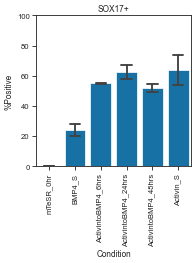

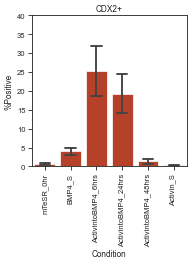

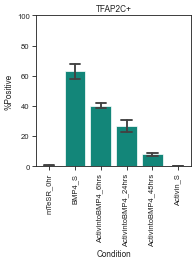

In [15]:
## Activin to BMP4

Marker = 'SOX17'
SwDir = 'AtB'

subset, order = PF.process_addswitch(AddSwitch, SwDir, Marker)
PF.barplot_fs(subset, 100, order, ingeo_colours[0], Marker)

Marker = 'CDX2'
SwDir = 'AtB'

subset, order = PF.process_addswitch(AddSwitch, SwDir, Marker)
PF.barplot_fs(subset, 40, order, ingeo_colours[4], Marker)

Marker = 'TFAP2C'
SwDir = 'AtB'

subset, order = PF.process_addswitch(AddSwitch, SwDir, Marker)
PF.barplot_fs(subset, 100, order, ingeo_colours[2], Marker)